In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [314]:
df = pd.read_csv('Admission_Predict.csv')

In [315]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [316]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [317]:
#getting information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


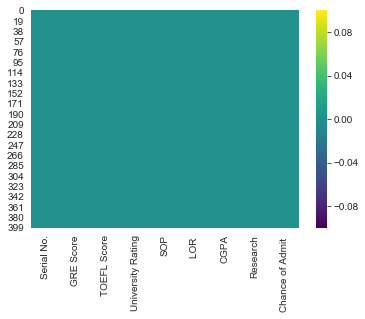

In [318]:
#check null values
# we cansee from info that there are no null values in the data set but if there are any null values we can visualize them with seaborn
sns.heatmap(df.isnull(), cmap= 'viridis')

In [319]:
#since data set is relatively small we can visualize how each column is realated to other columns in the data set.
df.drop('Serial No.', axis = 1, inplace=True)

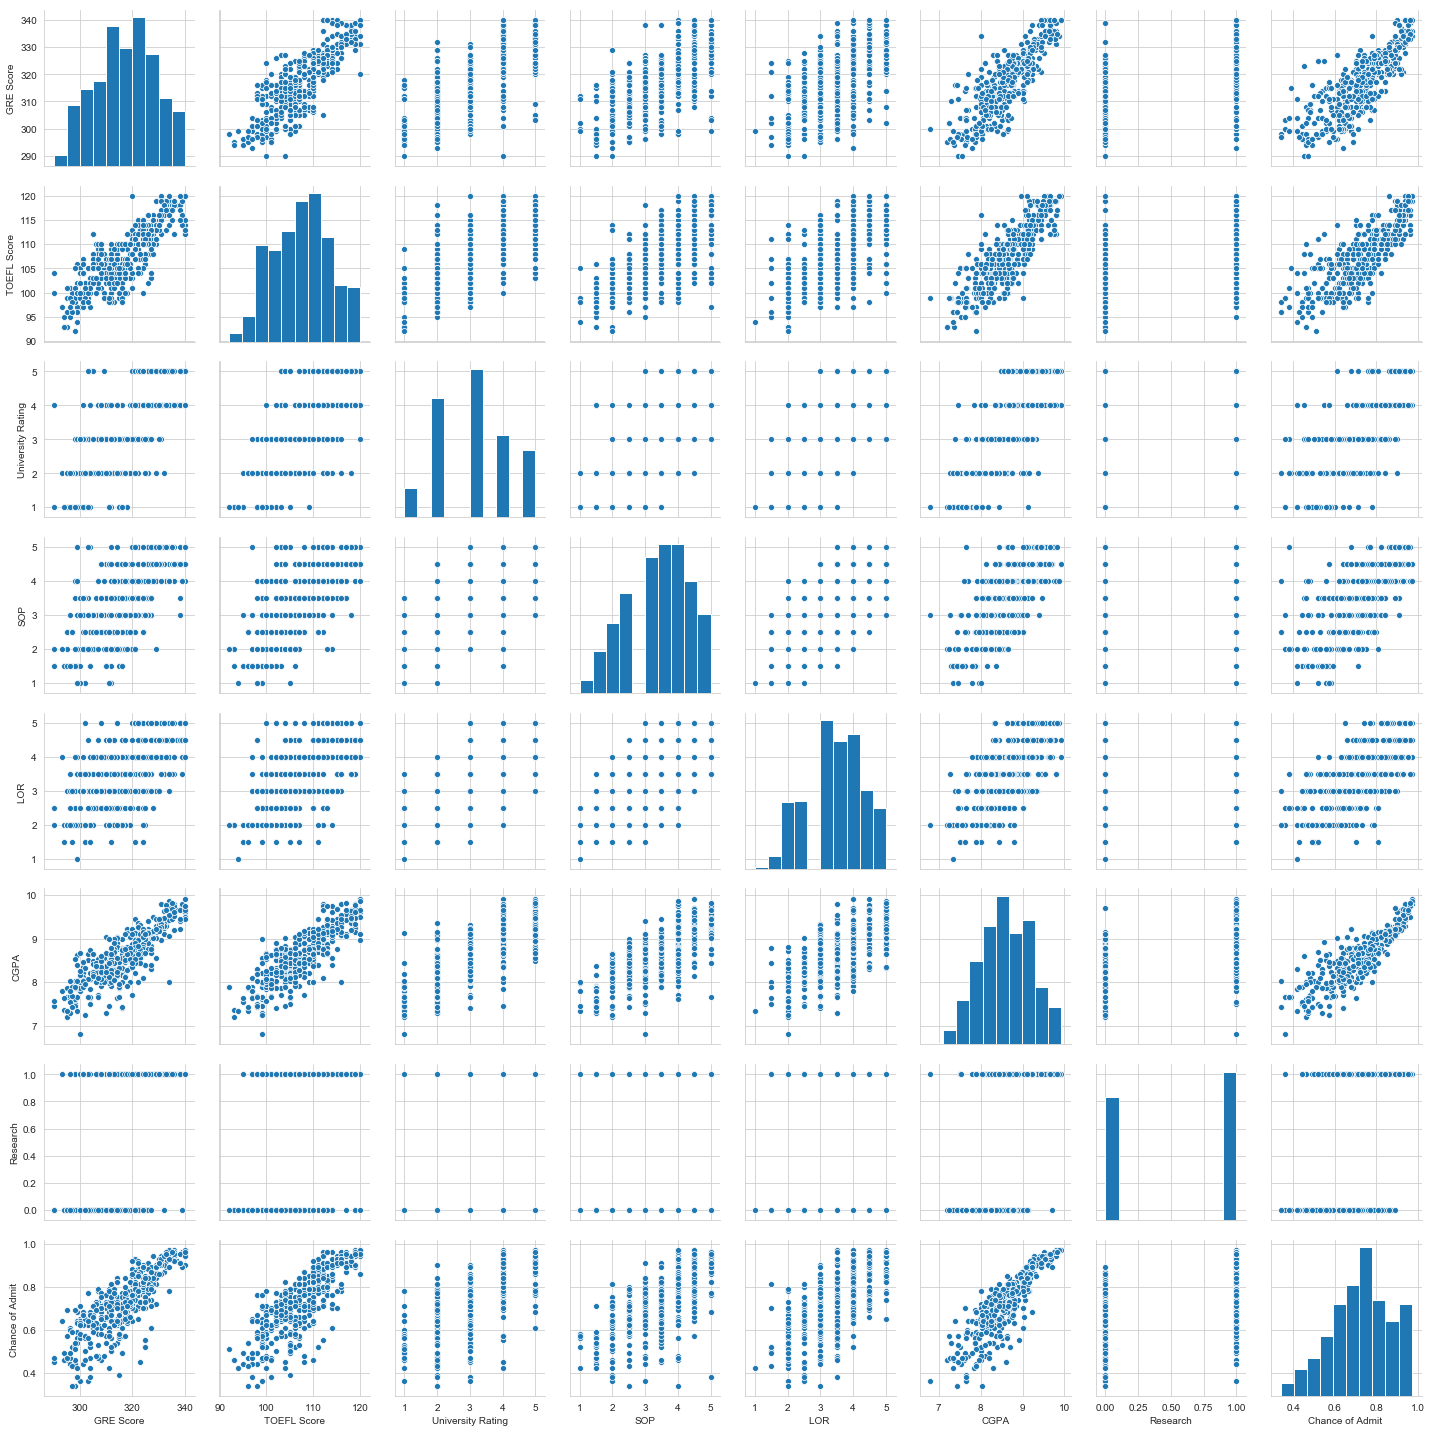

In [320]:
sns.set_style('whitegrid')
sns.pairplot(data = df, palette= 'rainbow')

C:\Users\natar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


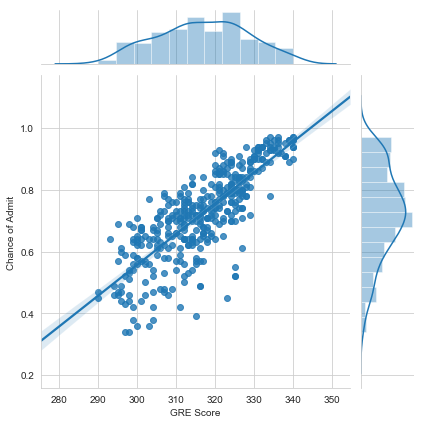

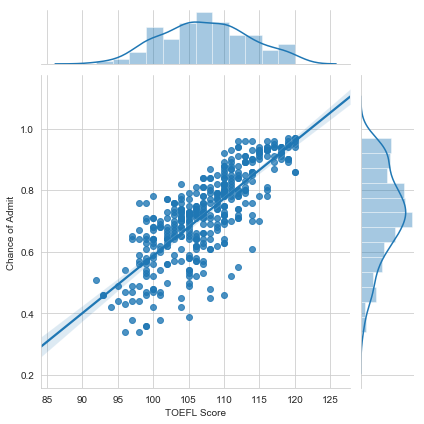

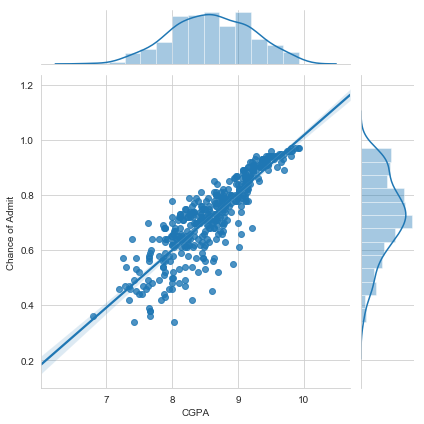

In [321]:
#from above pair plot we can see that Chance of Admit share linear realation with GRE Score, TOEFL score  and CGPA
# we confirm this with following joint plots
features  = ['GRE Score', 'TOEFL Score', 'CGPA']
for fea in features:
    sns.jointplot(df[(fea)], y = df[('Chance of Admit ')],kind ='reg')

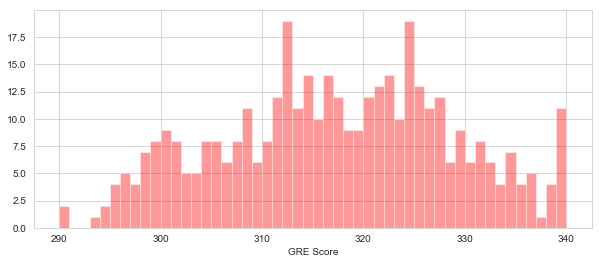

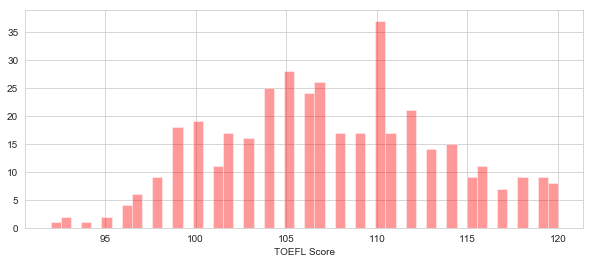

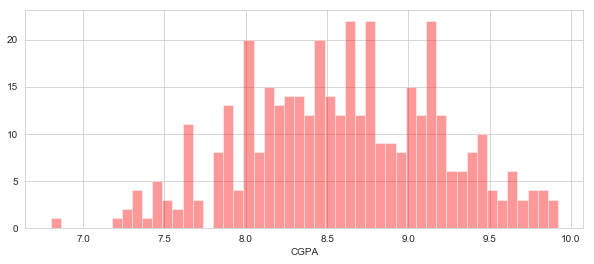

In [322]:
# lets explore data more
for fea in features:
    plt.figure(figsize=(10,4))
    sns.distplot(df[fea], color= 'red', kde = False, bins = 50)

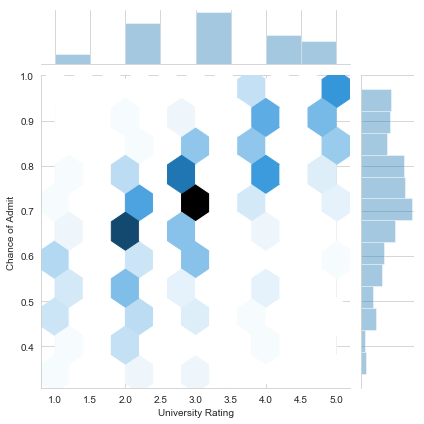

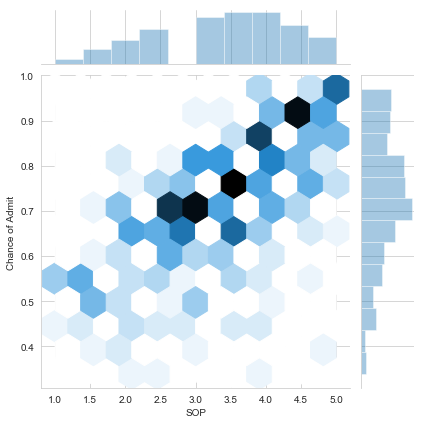

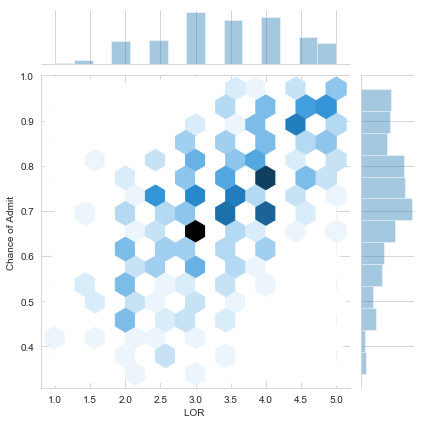

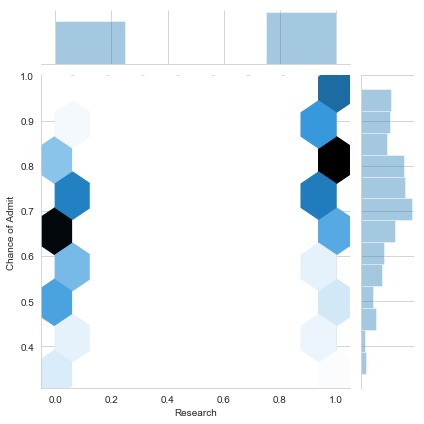

In [323]:
features2 = ['University Rating', 'SOP', 'LOR ', 'Research']
for fea in features2:
    sns.jointplot(df[(fea)], y = df['Chance of Admit '],kind ='hex')

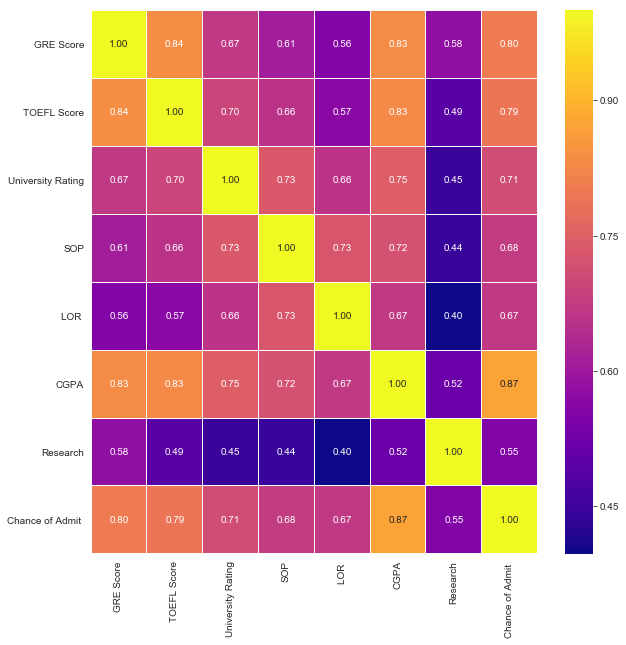

In [324]:
#checking the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="plasma",)

In [325]:
df.loc[df['Chance of Admit ']>=0.9, 'Target'] = "Highly Likely"
df.loc[(df['Chance of Admit ']>=0.8) &(df['Chance of Admit ']<0.9), 'Target'] = "Likely"
df.loc[(df['Chance of Admit ']>=0.7) &(df['Chance of Admit ']<0.8), 'Target'] = "Reach"
df.loc[df['Chance of Admit ']<.7, 'Target'] = "Not Possible"

In [326]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Target
0,337,118,4,4.5,4.5,9.65,1,0.92,Highly Likely
1,324,107,4,4.0,4.5,8.87,1,0.76,Reach
2,316,104,3,3.0,3.5,8.00,1,0.72,Reach
3,322,110,3,3.5,2.5,8.67,1,0.80,Likely
4,314,103,2,2.0,3.0,8.21,0,0.65,Not Possible


In [327]:
from sklearn.preprocessing import LabelEncoder

In [328]:
lbl_enc = LabelEncoder()
df['Target_encoder'] = lbl_enc.fit_transform(df['Target'])

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
Target               400 non-null object
Target_encoder       400 non-null int32
dtypes: float64(4), int32(1), int64(4), object(1)
memory usage: 29.8+ KB


In [330]:
#lets predict chances
X = df.drop(['Chance of Admit ', 'Target'], axis=1)
y = df['Target_encoder']

In [331]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Target_encoder
0,337,118,4,4.5,4.5,9.65,1,0
1,324,107,4,4.0,4.5,8.87,1,3
2,316,104,3,3.0,3.5,8.00,1,3
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,2


In [332]:
y.head()

0    0
1    3
2    3
3    1
4    2
Name: Target_encoder, dtype: int32

In [333]:
from sklearn.model_selection import train_test_split

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [335]:
#lets predict using logistic Regression
from sklearn.linear_model import LogisticRegression

In [336]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\natar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\natar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [337]:
log_prediction = log_reg.predict(X_test)

In [338]:
from sklearn.metrics import classification_report, confusion_matrix

In [339]:
print(classification_report(y_test, log_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      0.67      0.76        12
           2       0.91      0.96      0.94        54
           3       0.98      0.98      0.98        43

   micro avg       0.94      0.94      0.94       120
   macro avg       0.94      0.90      0.92       120
weighted avg       0.94      0.94      0.94       120

